##Downloading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Colab_Notebooks/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d chiragsoni/ferdata

Dataset URL: https://www.kaggle.com/datasets/chiragsoni/ferdata
License(s): CC0-1.0
 99% 60.0M/60.3M [00:03<00:00, 21.0MB/s]
100% 60.3M/60.3M [00:04<00:00, 15.8MB/s]


In [ ]:
!unzip /content/ferdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resol

#Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from skimage.io import imread
from skimage.transform import rescale
from tensorflow.keras.preprocessing import image
from PIL import Image
from tqdm import tqdm
from keras.layers import Input, UpSampling2D, Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential, Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2, InceptionV3, MobileNet
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from keras.preprocessing import image
import os
sns.set()

#Loading the Dataset

##Loading Training Data

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     width_shift_range = 0.1,
     height_shift_range = 0.1,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode='categorical',
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

##Loading Test Dataset

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(128,128),
                                           batch_size=32,
                                           class_mode='categorical',
                                  )

val_data.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

#Visualization of Emotion Category Distribution in Training Data

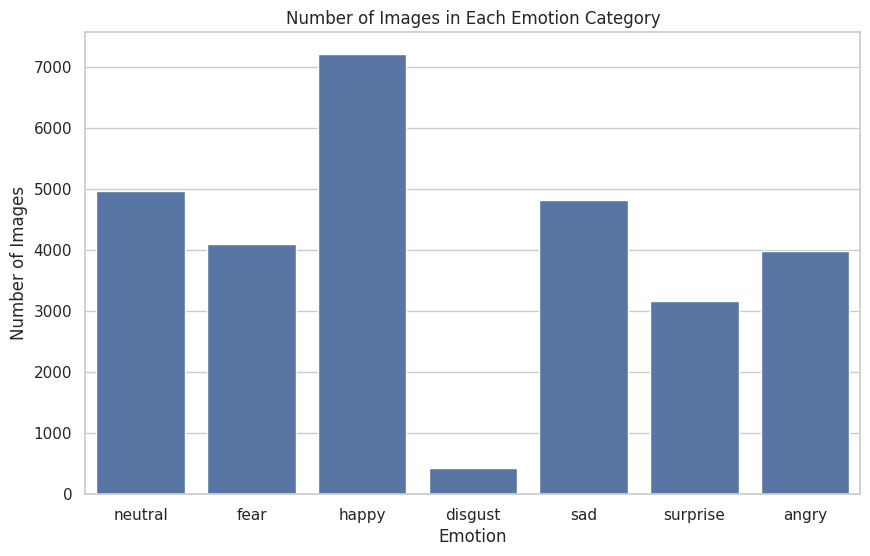

In [ ]:
path = '/content/train'

emotions = os.listdir(path)

folder_names = []
counts = []

for emotion in emotions:
    emotion_path = os.path.join(path, emotion)
    num_images = len(os.listdir(emotion_path))

    folder_names.append(emotion)
    counts.append(num_images)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=folder_names, y=counts)
ax.set(xlabel='Emotion', ylabel='Number of Images')
plt.title('Number of Images in Each Emotion Category')
plt.show()

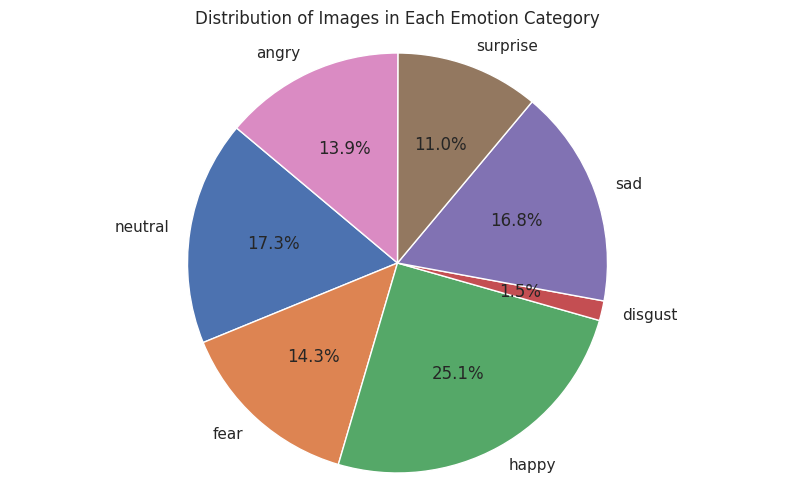

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=folder_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images in Each Emotion Category')
plt.axis('equal')
plt.show()

#Visualization of Sample Images from Training Data

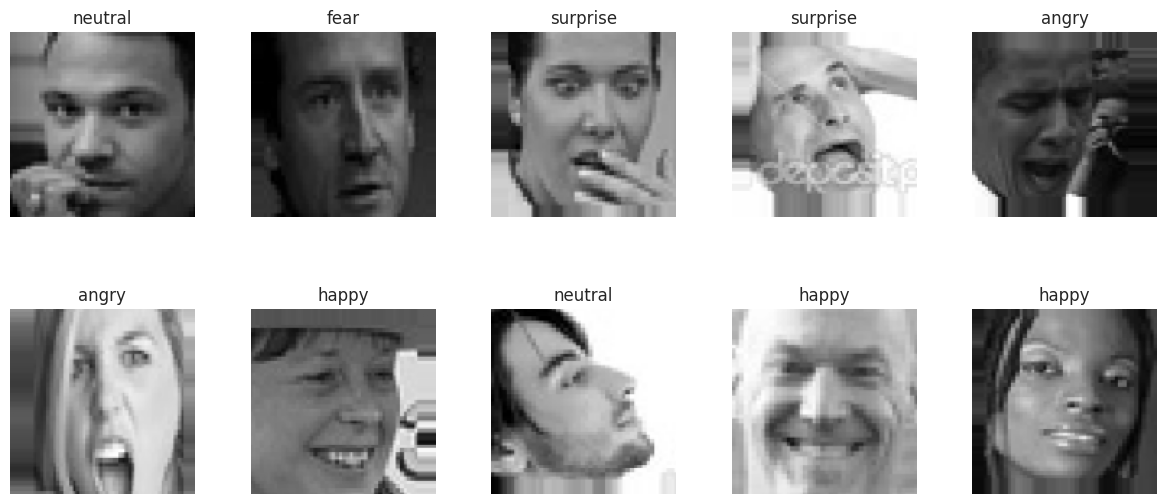

In [ ]:
t_img, label = next(train_data)  # Correct way to fetch the next batch


def plotImages(img_arr, one_hot_labels, label_names):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.5)

    for i, (im, one_hot_label) in enumerate(zip(img_arr, one_hot_labels)):
        label_index = np.argmax(one_hot_label)
        label_name = label_names[label_index]

        ax = axes[i // 5, i % 5]
        ax.imshow(im)
        ax.set_title(label_name)
        ax.axis('off')

        if i == 9:
            break

label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

plotImages(t_img, label, label_names)

#Deep Learning

## Traansfer Learning(TL)

###MobileNet-based CNN Model

In [ ]:
base_model = MobileNet( weights = 'imagenet', input_shape = (128,128,3), include_top = False )

x = base_model.output
x= Conv2D(filters = 32, kernel_size = (1,1), strides = (1,1), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= GlobalAveragePooling2D()(x)

x = Flatten()(x)

x = Dense(units = 256 , activation = 'relu' )(x)
x= Dropout(0.3)(x)

x = Dense(units = 512 , activation = 'relu' )(x)
x= Dropout(0.3)(x)

x = Dense(units=7 , activation = 'softmax' )(x)

model = Model(base_model.input, outputs = x)

model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy']  )
model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 64, 64, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 64, 64, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 32, 32, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 32, 32, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 32, 32, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 32, 32, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,095,847 (19.44 MB)

 Trainable params: 5,073,959 (19.36 MB)

 Non-trainable params: 21,888 (85.50 KB)

###Model Training with Callbacks

In [ ]:
checkpoint = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                          min_delta=0.01,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [ ]:
hist = model.fit(train_data, epochs = 25, validation_data = val_data, callbacks = callbacks_list, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25

Epoch 1: val_accuracy improved from -inf to 0.49471, saving model to best_model.h5


898/898 - 206s - 230ms/step - accuracy: 0.4032 - loss: 1.5033 - val_accuracy: 0.4947 - val_loss: 1.3131 - learning_rate: 0.0010
Epoch 2/25

Epoch 2: val_accuracy did not improve from 0.49471
898/898 - 133s - 148ms/step - accuracy: 0.5078 - loss: 1.3074 - val_accuracy: 0.4641 - val_loss: 1.4621 - learning_rate: 0.0010
Epoch 3/25

Epoch 3: val_accuracy improved from 0.49471 to 0.54792, saving model to best_model.h5


898/898 - 133s - 148ms/step - accuracy: 0.5428 - loss: 1.2218 - val_accuracy: 0.5479 - val_loss: 1.1909 - learning_rate: 0.0010
Epoch 4/25

Epoch 4: val_accuracy improved from 0.54792 to 0.58233, saving model to best_model.h5


898/898 - 134s - 149ms/step - accuracy: 0.5681 - loss: 1.1568 - val_accuracy: 0.5823 - val_loss: 1.1098 - learning_rate: 0.0010
Epoch 5/25

Epoch 5: val_accuracy did not improve from 0.58233
898/898 - 132s - 147ms/step - accuracy: 0.5858 - loss: 1.1136 - val_accuracy: 0.5605 - val_loss: 1.1733 - learning_rate: 0.0010
Epoch 6/25

Epoch 6: val_accuracy improved from 0.58233 to 0.60045, saving model to best_model.h5


898/898 - 134s - 150ms/step - accuracy: 0.6040 - loss: 1.0727 - val_accuracy: 0.6004 - val_loss: 1.0637 - learning_rate: 0.0010
Epoch 7/25

Epoch 7: val_accuracy did not improve from 0.60045
898/898 - 133s - 149ms/step - accuracy: 0.6167 - loss: 1.0393 - val_accuracy: 0.5907 - val_loss: 1.0721 - learning_rate: 0.0010
Epoch 8/25

Epoch 8: val_accuracy did not improve from 0.60045
898/898 - 132s - 147ms/step - accuracy: 0.6262 - loss: 1.0132 - val_accuracy: 0.5974 - val_loss: 1.0567 - learning_rate: 0.0010
Epoch 9/25

Epoch 9: val_accuracy improved from 0.60045 to 0.61493, saving model to best_model.h5


898/898 - 131s - 146ms/step - accuracy: 0.6419 - loss: 0.9819 - val_accuracy: 0.6149 - val_loss: 1.0506 - learning_rate: 0.0010
Epoch 10/25

Epoch 10: val_accuracy did not improve from 0.61493
898/898 - 132s - 146ms/step - accuracy: 0.6470 - loss: 0.9566 - val_accuracy: 0.6110 - val_loss: 1.0824 - learning_rate: 0.0010
Epoch 11/25

Epoch 11: val_accuracy did not improve from 0.61493
898/898 - 133s - 148ms/step - accuracy: 0.6593 - loss: 0.9290 - val_accuracy: 0.6046 - val_loss: 1.0914 - learning_rate: 0.0010
Epoch 12/25

Epoch 12: val_accuracy improved from 0.61493 to 0.63332, saving model to best_model.h5


898/898 - 133s - 148ms/step - accuracy: 0.6685 - loss: 0.9121 - val_accuracy: 0.6333 - val_loss: 1.0265 - learning_rate: 0.0010
Epoch 13/25

Epoch 13: val_accuracy did not improve from 0.63332
898/898 - 131s - 146ms/step - accuracy: 0.6774 - loss: 0.8853 - val_accuracy: 0.6272 - val_loss: 1.0227 - learning_rate: 0.0010
Epoch 14/25

Epoch 14: val_accuracy did not improve from 0.63332
898/898 - 135s - 150ms/step - accuracy: 0.6943 - loss: 0.8498 - val_accuracy: 0.6319 - val_loss: 1.0306 - learning_rate: 0.0010
Epoch 15/25

Epoch 15: val_accuracy did not improve from 0.63332
898/898 - 132s - 147ms/step - accuracy: 0.7030 - loss: 0.8290 - val_accuracy: 0.6257 - val_loss: 1.1304 - learning_rate: 0.0010
Epoch 16/25

Epoch 16: val_accuracy did not improve from 0.63332
898/898 - 133s - 148ms/step - accuracy: 0.7112 - loss: 0.8058 - val_accuracy: 0.6314 - val_loss: 1.0479 - learning_rate: 0.0010
Epoch 17/25

Epoch 17: val_accuracy did not improve from 0.63332
898/898 - 132s - 147ms/step - accur


Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
898/898 - 133s - 148ms/step - accuracy: 0.7295 - loss: 0.7551 - val_accuracy: 0.6484 - val_loss: 1.0295 - learning_rate: 0.0010
Epoch 19/25

Epoch 19: val_accuracy improved from 0.64837 to 0.66941, saving model to best_model.h5


898/898 - 132s - 147ms/step - accuracy: 0.7703 - loss: 0.6478 - val_accuracy: 0.6694 - val_loss: 0.9978 - learning_rate: 2.0000e-04
Epoch 20/25

Epoch 20: val_accuracy improved from 0.66941 to 0.67094, saving model to best_model.h5


898/898 - 131s - 146ms/step - accuracy: 0.7878 - loss: 0.5972 - val_accuracy: 0.6709 - val_loss: 0.9909 - learning_rate: 2.0000e-04
Epoch 21/25

Epoch 21: val_accuracy improved from 0.67094 to 0.67331, saving model to best_model.h5


898/898 - 133s - 149ms/step - accuracy: 0.7980 - loss: 0.5681 - val_accuracy: 0.6733 - val_loss: 1.0311 - learning_rate: 2.0000e-04
Epoch 22/25

Epoch 22: val_accuracy did not improve from 0.67331
898/898 - 133s - 148ms/step - accuracy: 0.8077 - loss: 0.5514 - val_accuracy: 0.6728 - val_loss: 1.0241 - learning_rate: 2.0000e-04
Epoch 23/25

Epoch 23: val_accuracy improved from 0.67331 to 0.67345, saving model to best_model.h5


898/898 - 133s - 148ms/step - accuracy: 0.8149 - loss: 0.5275 - val_accuracy: 0.6734 - val_loss: 1.0374 - learning_rate: 2.0000e-04
Epoch 24/25

Epoch 24: val_accuracy improved from 0.67345 to 0.67568, saving model to best_model.h5


898/898 - 133s - 148ms/step - accuracy: 0.8229 - loss: 0.5079 - val_accuracy: 0.6757 - val_loss: 1.0571 - learning_rate: 2.0000e-04
Epoch 25/25

Epoch 25: val_accuracy improved from 0.67568 to 0.67609, saving model to best_model.h5



Epoch 25: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
898/898 - 134s - 149ms/step - accuracy: 0.8261 - loss: 0.4946 - val_accuracy: 0.6761 - val_loss: 1.0642 - learning_rate: 2.0000e-04
Restoring model weights from the end of the best epoch: 19.


In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/DL Model/Emotion_Detection.h5')
model = load_model('/content/drive/MyDrive/Colab_Notebooks/DL Model/Emotion_Detection.h5')

In [ ]:
import os
file_path = "/content/drive/MyDrive/Colab_Notebooks/DL Model/Emotion_Detection.h5"
print("File exists:", os.path.exists(file_path))


File exists: True


###Training and Validation Metrics Visualization

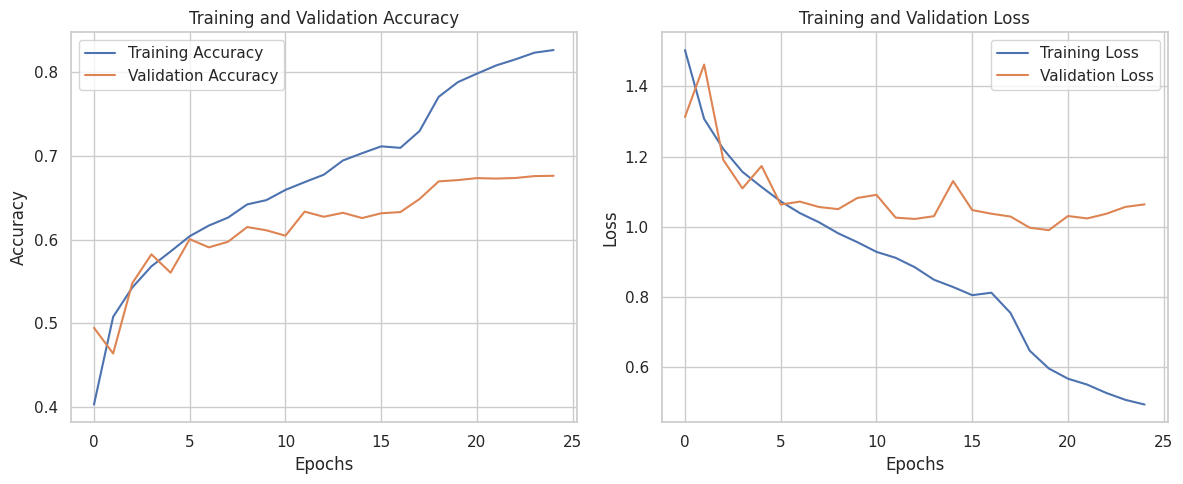

In [ ]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

###Evaluation of the Model

In [ ]:
results = model.evaluate(val_data, verbose=True)

loss = round(results[0], 2)
accuracy = round(results[1] * 100, 2)

print(f'Test results - Loss: {loss} - Accuracy: {accuracy}%')

225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6699 - loss: 0.9633
Test results - Loss: 1.0 - Accuracy: 66.94%


###Model Prediction on Test Images

In [ ]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
/content/test/neutral/PrivateTest_11239107.jpg 
The image is of neutral.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
/content/test/disgust/PrivateTest_89077668.jpg 
The image is of disgust.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/test/angry/PrivateTest_10590091.jpg 
The image is of sad.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/test/fear/PrivateTest_1161501.jpg 
The image is of fear.



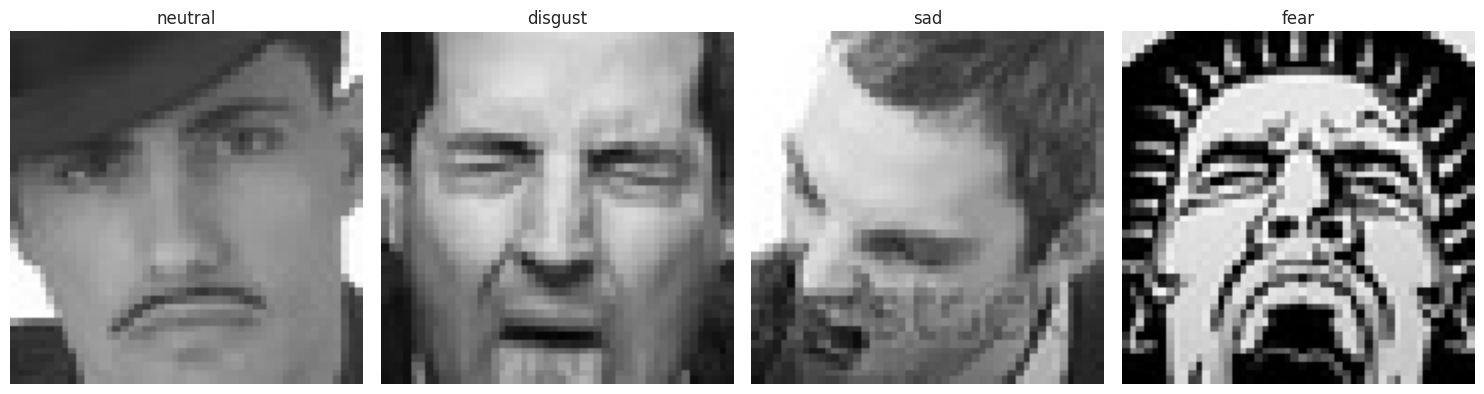

In [ ]:
image_paths = [
    '/content/test/neutral/PrivateTest_11239107.jpg',
    '/content/test/disgust/PrivateTest_89077668.jpg',
    '/content/test/angry/PrivateTest_10590091.jpg',
    '/content/test/fear/PrivateTest_1161501.jpg'
]

num_images = len(image_paths)
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(128, 128))
    img_arr = img_to_array(img) / 255
    input_arr = np.array([img_arr])
    pred = np.argmax(model.predict(input_arr))
    print(f"{path} \nThe image is of {op[pred]}.\n")

    axs[i].imshow(img_arr)
    axs[i].set_title(op[pred])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

##Convolutional Neural Network (CNN)

###CNN Model

In [25]:
model_cnn = Sequential()

model_cnn.add(Conv2D(filters = 128, kernel_size = (1,1), input_shape = [128,128,3]))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPool2D(pool_size = (2,2)))

model_cnn.add(Conv2D(filters = 256, kernel_size = (3,3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPool2D(pool_size = (2,2)))

model_cnn.add(Conv2D(filters = 512, kernel_size = (3,3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPool2D(pool_size = (2,2)))

model_cnn.add(Flatten())

model_cnn.add(Dense(units = 256))
model_cnn.add(Activation('relu'))

model_cnn.add(Dense(units = 512))
model_cnn.add(Activation('relu'))

model_cnn.add(Dense(units = 1024))
model_cnn.add(Activation('relu'))

model_cnn.add(Dense(units = 7, activation = 'softmax'))

model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 128)       │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 62, 62, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 29, 29, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,830,279 (106.16 MB)

 Trainable params: 27,830,279 (106.16 MB)

 Non-trainable params: 0 (0.00 B)

###Model Training with Callbacks

In [26]:
hist_cnn = model_cnn.fit(train_data, epochs = 25, validation_data = val_data, callbacks = callbacks_list, verbose=2)

Epoch 1/25

Epoch 1: val_accuracy did not improve from 0.67609
898/898 - 175s - 195ms/step - accuracy: 0.2501 - loss: 1.8227 - val_accuracy: 0.2515 - val_loss: 1.8096 - learning_rate: 0.0010
Epoch 2/25

Epoch 2: val_accuracy did not improve from 0.67609
898/898 - 155s - 172ms/step - accuracy: 0.2744 - loss: 1.7641 - val_accuracy: 0.3305 - val_loss: 1.6801 - learning_rate: 0.0010
Epoch 3/25

Epoch 3: val_accuracy did not improve from 0.67609
898/898 - 150s - 167ms/step - accuracy: 0.3255 - loss: 1.6815 - val_accuracy: 0.4014 - val_loss: 1.5309 - learning_rate: 0.0010
Epoch 4/25

Epoch 4: val_accuracy did not improve from 0.67609
898/898 - 150s - 167ms/step - accuracy: 0.3767 - loss: 1.5849 - val_accuracy: 0.4316 - val_loss: 1.4659 - learning_rate: 0.0010
Epoch 5/25

Epoch 5: val_accuracy did not improve from 0.67609
898/898 - 150s - 167ms/step - accuracy: 0.4072 - loss: 1.5155 - val_accuracy: 0.4387 - val_loss: 1.4402 - learning_rate: 0.0010
Epoch 6/25

Epoch 6: val_accuracy did not imp

###Training and Validation Metrics Visualization

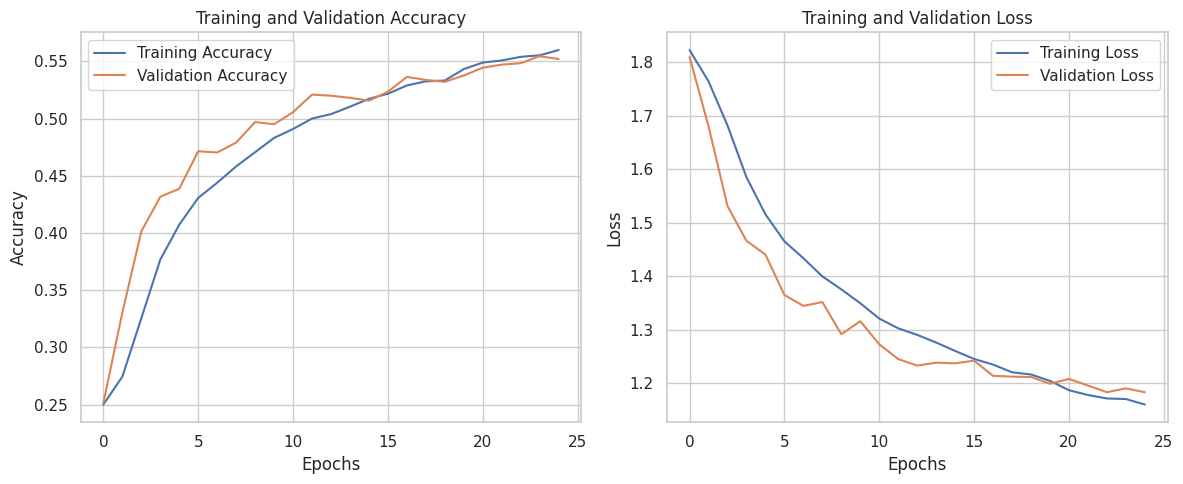

In [27]:
train_acc = hist_cnn.history['accuracy']
val_acc = hist_cnn.history['val_accuracy']
train_loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

###Evaluation of the Model on Validation Data

In [28]:
results = model_cnn.evaluate(val_data, verbose=True)

loss = round(results[0], 2)
accuracy = round(results[1] * 100, 2)

print(f'Test results - Loss: {loss} - Accuracy: {accuracy}%')

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5452 - loss: 1.1866
Test results - Loss: 1.2 - Accuracy: 54.71%


###Model Prediction on Test Images

In [29]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
/content/test/neutral/PrivateTest_11239107.jpg 
The image is of angry.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/test/disgust/PrivateTest_89077668.jpg 
The image is of angry.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/test/angry/PrivateTest_10590091.jpg 
The image is of sad.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
/content/test/fear/PrivateTest_1161501.jpg 
The image is of fear.



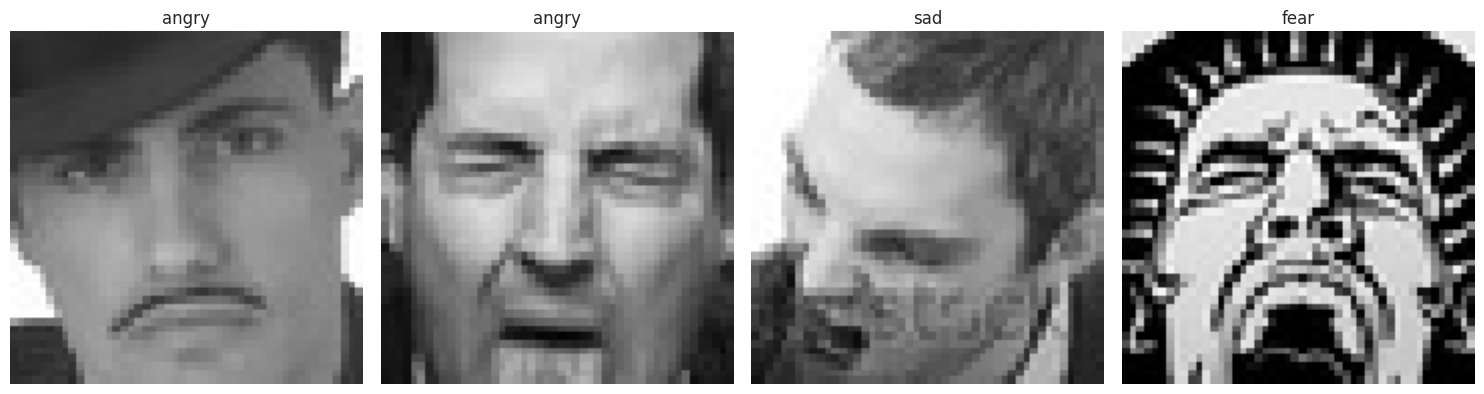

In [30]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

image_paths = [
    '/content/test/neutral/PrivateTest_11239107.jpg',
    '/content/test/disgust/PrivateTest_89077668.jpg',
    '/content/test/angry/PrivateTest_10590091.jpg',
    '/content/test/fear/PrivateTest_1161501.jpg'
]

num_images = len(image_paths)
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(128, 128))
    img_arr = img_to_array(img) / 255
    input_arr = np.array([img_arr])
    pred = np.argmax(model_cnn.predict(input_arr))
    print(f"{path} \nThe image is of {op[pred]}.\n")

    axs[i].imshow(img_arr)
    axs[i].set_title(op[pred])
    axs[i].axis('off')

plt.tight_layout()
plt.show()